 # Online Shoppers Intention Data Study

In [1]:
# loading library by its rank
library(plyr)
library(dplyr)
library(ggplot2)

library(ellipse)
library(RColorBrewer)

library(xgboost)
library(randomForest)
library(lubridate)
library(doSNOW)
library(foreach)
library(parallel)
library(rpart)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ellipse' was built under R version 3.6.3"
Attaching package: 'ellipse'

The following object is masked from 'package:graphics':

    pairs

Warning message:
"package 'xgboost' was built under R version 3.6.3"
Attaching package: 'xgboost'

The following object is masked from 'package:dplyr':

    slice

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin

The following object is masked from 'package:dplyr':

    combine

Warning message:
"packag

### **Step 1: Load the data in csv format**

In [2]:
# Load the online shoppers intention data.

osi.df <- read.csv("online_shoppers_intention.csv", header=TRUE)

### **Step 2: Understanding the Data**

In [3]:
# Check the number of rows in the online shoppers intention data.
nrow(osi.df)

[1] 12330

In [4]:
# show head
head(osi.df)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Month,Revenue
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,1,1,1,1,Returning_Visitor,FALSE,Feb,FALSE
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,2,2,1,2,Returning_Visitor,FALSE,Feb,FALSE
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,4,1,9,3,Returning_Visitor,FALSE,Feb,FALSE
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,3,2,2,4,Returning_Visitor,FALSE,Feb,FALSE
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,3,3,1,4,Returning_Visitor,TRUE,Feb,FALSE
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,2,2,1,3,Returning_Visitor,FALSE,Feb,FALSE


In [5]:
dim(osi.df)

[1] 12330    18

In [6]:
names(osi.df)

[1] "Administrative"          "Administrative_Duration"
 [3] "Informational"           "Informational_Duration" 
 [5] "ProductRelated"          "ProductRelated_Duration"
 [7] "BounceRates"             "ExitRates"              
 [9] "PageValues"              "SpecialDay"             
[11] "OperatingSystems"        "Browser"                
[13] "Region"                  "TrafficType"            
[15] "VisitorType"             "Weekend"                
[17] "Month"                   "Revenue"

In [7]:
#summary stats 
summary(osi.df[,1:10]) 
summary(osi.df[,11:18]) 

 Administrative   Administrative_Duration Informational    
 Min.   : 0.000   Min.   :   0.00         Min.   : 0.0000  
 1st Qu.: 0.000   1st Qu.:   0.00         1st Qu.: 0.0000  
 Median : 1.000   Median :   7.50         Median : 0.0000  
 Mean   : 2.315   Mean   :  80.82         Mean   : 0.5036  
 3rd Qu.: 4.000   3rd Qu.:  93.26         3rd Qu.: 0.0000  
 Max.   :27.000   Max.   :3398.75         Max.   :24.0000  
 Informational_Duration ProductRelated   ProductRelated_Duration
 Min.   :   0.00        Min.   :  0.00   Min.   :    0.0        
 1st Qu.:   0.00        1st Qu.:  7.00   1st Qu.:  184.1        
 Median :   0.00        Median : 18.00   Median :  598.9        
 Mean   :  34.47        Mean   : 31.73   Mean   : 1194.8        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1464.2        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
  BounceRates         ExitRates         PageValues        SpecialDay     
 Min.   :0.000000   Min.   :0.00000   Min.   :  0.0

 OperatingSystems    Browser           Region       TrafficType   
 Min.   :1.000    Min.   : 1.000   Min.   :1.000   Min.   : 1.00  
 1st Qu.:2.000    1st Qu.: 2.000   1st Qu.:1.000   1st Qu.: 2.00  
 Median :2.000    Median : 2.000   Median :3.000   Median : 2.00  
 Mean   :2.124    Mean   : 2.357   Mean   :3.147   Mean   : 4.07  
 3rd Qu.:3.000    3rd Qu.: 2.000   3rd Qu.:4.000   3rd Qu.: 4.00  
 Max.   :8.000    Max.   :13.000   Max.   :9.000   Max.   :20.00  
                                                                  
            VisitorType     Weekend            Month       Revenue       
 New_Visitor      : 1694   Mode :logical   May    :3364   Mode :logical  
 Other            :   85   FALSE:9462      Nov    :2998   FALSE:10422    
 Returning_Visitor:10551   TRUE :2868      Mar    :1907   TRUE :1908     
                                           Dec    :1727                  
                                           Oct    : 549                  
                    

### **Step 3: Data Visualization**

In [8]:
# finds all correlation values for all pairs of attributes between 1 - 14

cor(osi.df[,c(1:14)],use="complete.obs")

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
Administrative,1.000000000,0.601583342,0.376850429,0.255848140,0.431119340,0.37393901,-0.223562630,-0.316482998,0.09898959,-0.094777598,-0.006347063,-0.025034572,-0.005486805,-0.03356071
Administrative_Duration,0.601583342,1.000000000,0.302709709,0.238030789,0.289086621,0.35542195,-0.144170410,-0.205797757,0.06760848,-0.073303725,-0.007343418,-0.015391527,-0.005560563,-0.01437643
Informational,0.376850429,0.302709709,1.000000000,0.618954862,0.374164291,0.38750531,-0.116113616,-0.163666061,0.04863169,-0.048219254,-0.009526668,-0.038234678,-0.029168638,-0.03449075
Informational_Duration,0.255848140,0.238030789,0.618954862,1.000000000,0.280046268,0.34736358,-0.074066610,-0.105275683,0.03086087,-0.030576549,-0.009578676,-0.019284981,-0.027144112,-0.02467491
ProductRelated,0.431119340,0.289086621,0.374164291,0.280046268,1.000000000,0.86092684,-0.204577633,-0.292526283,0.05628179,-0.023958175,0.004289621,-0.013145721,-0.038121842,-0.04306430
ProductRelated_Duration,0.373939013,0.355421954,0.387505306,0.347363577,0.860926836,1.00000000,-0.184541115,-0.251984097,0.05282306,-0.036379845,0.002975790,-0.007380440,-0.033090520,-0.03637717
BounceRates,-0.223562630,-0.144170410,-0.116113616,-0.074066610,-0.204577633,-0.18454112,1.000000000,0.913004396,-0.11938603,0.072702253,0.023823182,-0.015772209,-0.006485347,0.07828554
ExitRates,-0.316482998,-0.205797757,-0.163666061,-0.105275683,-0.292526283,-0.25198410,0.913004396,1.000000000,-0.17449831,0.102241802,0.014566735,-0.004442355,-0.008907006,0.07861633
PageValues,0.098989585,0.067608481,0.048631692,0.030860874,0.056281794,0.05282306,-0.119386026,-0.174498310,1.00000000,-0.063541272,0.018507947,0.045591919,0.011315299,0.01253169
SpecialDay,-0.094777598,-0.073303725,-0.048219254,-0.030576549,-0.023958175,-0.03637985,0.072702253,0.102241802,-0.06354127,1.000000000,0.012652235,0.003498747,-0.016097975,0.05230144


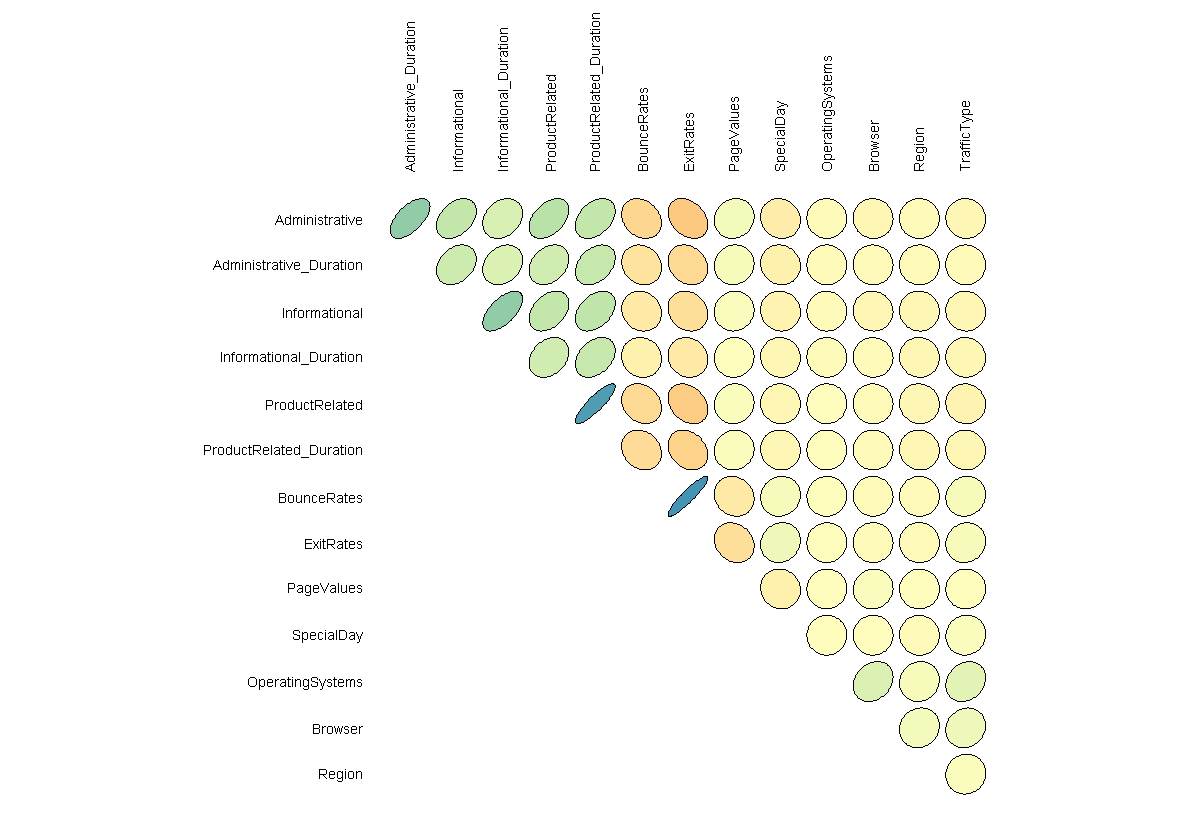

In [9]:
# generate correlation graph
options(repr.plot.height=10); my_colors=colorRampPalette(brewer.pal(5, "Spectral"))(100)
options(repr.plot.width=10, repr.plot.height=7)

data=cor(osi.df[,c(1:14)],use="complete.obs")
 
plotcorr(data , col=my_colors[data*50+50], mar = c(0,0,0,0), cex.lab=0.7, type = "upper" , diag=FALSE)

In [10]:
# create a new dataframe id_means
id_means <- osi.df %>% 
  group_by(Revenue) %>% 
  summarize(mean_InfoDuration = mean(Informational_Duration)) 

id_means


Revenue,mean_InfoDuration
FALSE,30.23624
TRUE,57.61143


In [11]:
# create a new dataframe i_means
i_means <- osi.df %>% 
  group_by(Revenue) %>% 
  summarize(mean_Info = mean(Informational)) 

i_means

Revenue,mean_Info
FALSE,0.4518327
TRUE,0.7861635


In [12]:
# create a new dataframe a_means
a_means <- osi.df %>% 
  group_by(Revenue) %>% 
  summarize(mean_Admin = mean(Administrative)) 

a_means

Revenue,mean_Admin
FALSE,2.117732
TRUE,3.393606


In [13]:
# create a new dataframe ad_means
ad_means <- osi.df %>% 
  group_by(Revenue) %>% 
  summarize(mean_AdminDuration = mean(Administrative_Duration)) 

ad_means

Revenue,mean_AdminDuration
FALSE,73.74011
TRUE,119.48324


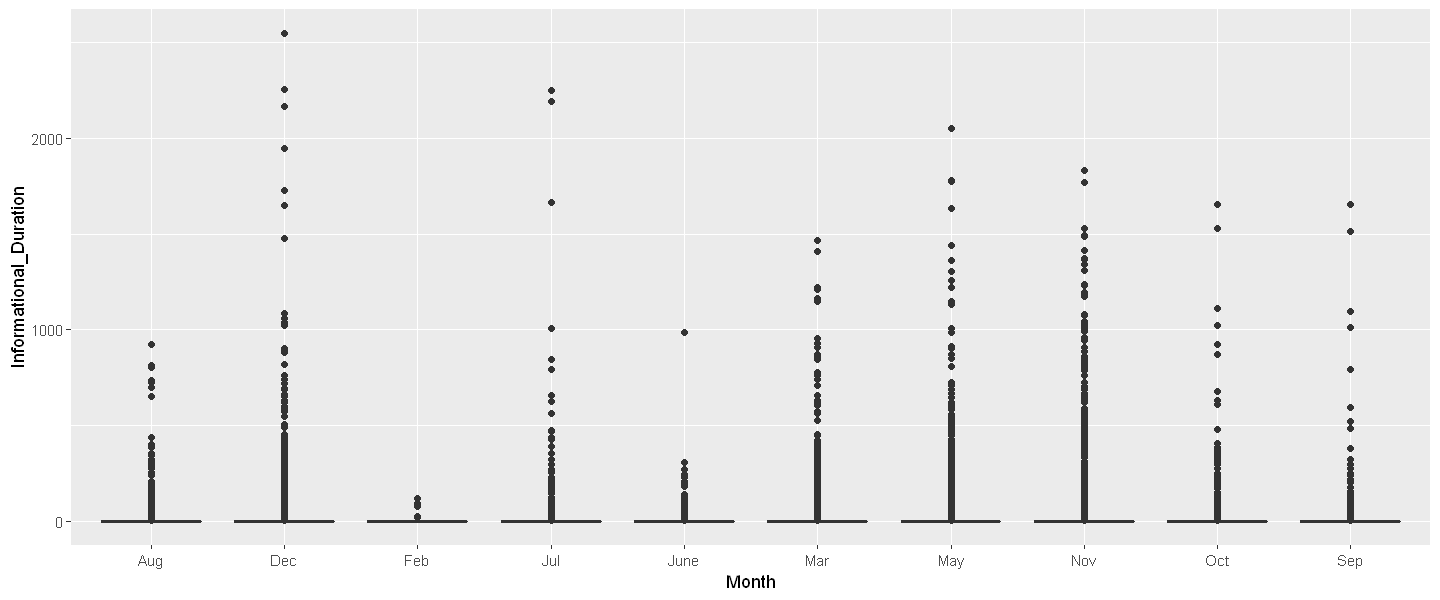

In [14]:
# Creating box plots 
options(repr.plot.width=12, repr.plot.height=5)
ggplot(osi.df, aes(x=Month, y=Informational_Duration)) +
geom_boxplot() 

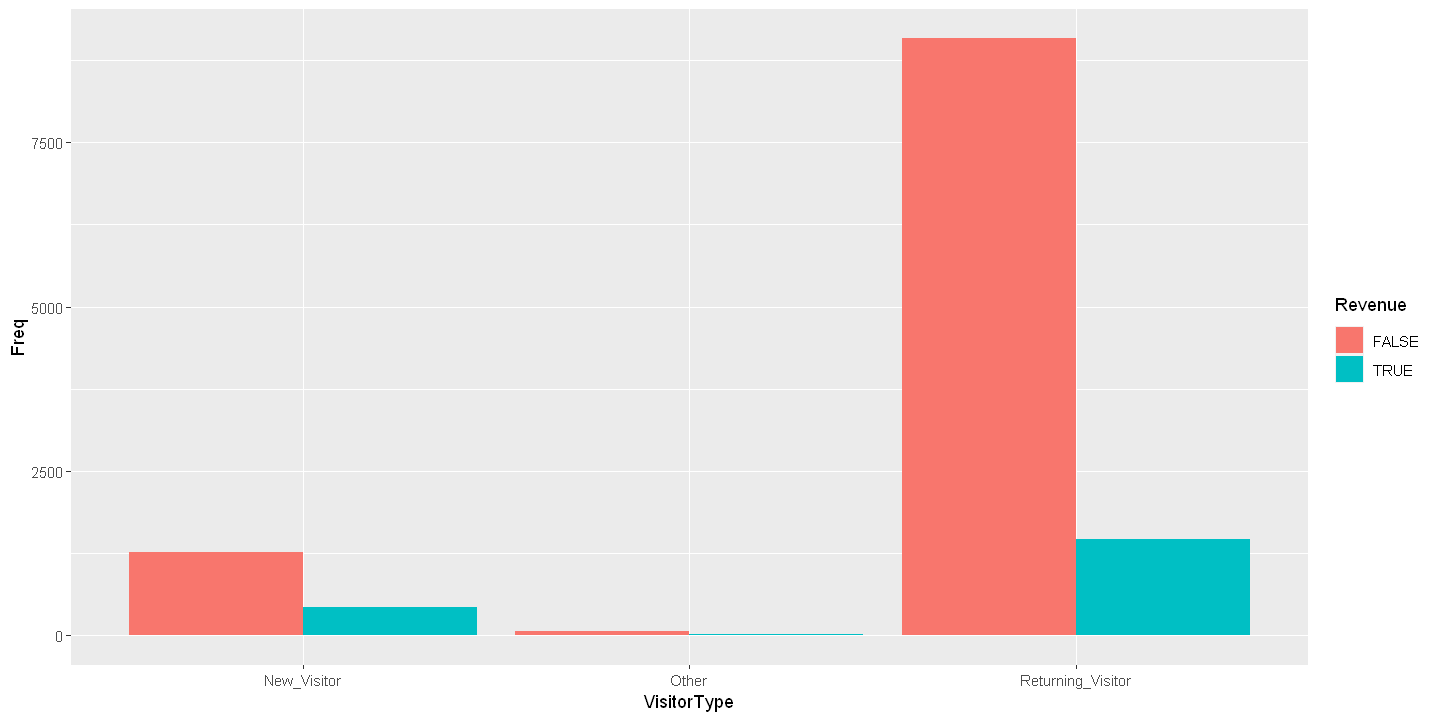

In [15]:
# creating bar plots
V_R_data <- with(osi.df, table(VisitorType, Revenue))
options(repr.plot.width=12, repr.plot.height=6)
ggplot(as.data.frame(V_R_data) , aes(VisitorType, Freq, fill=Revenue)) + 
geom_col(position = 'dodge')

### **Step 4: Preparing the data**

In [3]:
# show data details
str(osi.df)
unique(osi.df$Month)
unique(osi.df$Revenue)

'data.frame':	12330 obs. of  18 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 0 0 0 0 0 0 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 0 2 3 ...
 $ ProductRelated_Duration: num  0 64 0 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ OperatingSystems       : int  1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : int  1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : int  1 1 9 2 1 1 3 1 2 1 ...
 $ TrafficType            : int  1 2 3 4 4 3 3 5 3 2 ...
 $ VisitorType            : Factor w/ 3 levels "New_Visitor",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Weekend                : logi  FALSE FALSE FALSE FALSE TRUE

[1] Feb  Mar  May  Oct  June Jul  Aug  Nov  Sep  Dec 
Levels: Aug Dec Feb Jul June Mar May Nov Oct Sep

[1] FALSE  TRUE

In [4]:
# processing data and transform some attributes to numerical form
# assigning values to attribute Revenue and Weekend
# FALSE as 0, TRUE as 1
osi.df <- read.csv("online_shoppers_intention.csv", header=TRUE)
osi.df$Month <- factor(osi.df$Month, levels = c("Feb", "Mar", "May", "June", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"), ordered = TRUE)
osi.df$Month <- mapvalues(osi.df$Month, from = c('Feb', 'Mar', 'May', 'June','Jul', 'Aug', 'Sep','Oct', 'Nov','Dec'), to = c(1,2,3,4,5,6,7,8,9,10))
osi.df$Revenue <- ifelse(osi.df$Revenue == TRUE, 1, 0)
osi.df$Weekend <- ifelse(osi.df$Weekend == TRUE, 1, 0)
osi.df$Month <- as.numeric(levels(osi.df$Month)[osi.df$Month])   
str(osi.df)
unique(osi.df$Month)

'data.frame':	12330 obs. of  18 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 0 0 0 0 0 0 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 0 2 3 ...
 $ ProductRelated_Duration: num  0 64 0 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ OperatingSystems       : int  1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : int  1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : int  1 1 9 2 1 1 3 1 2 1 ...
 $ TrafficType            : int  1 2 3 4 4 3 3 5 3 2 ...
 $ VisitorType            : Factor w/ 3 levels "New_Visitor",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Weekend                : num  0 0 0 0 1 0 0 1 0 0 ...
 $ Mo

[1]  1  2  3  8  4  5  6  9  7 10

In [5]:
# analysis missing values
countNAs <- function (v) sum(is.na(v))

osi.countNAs <- sapply(osi.df, countNAs)
osi.countNAs

Administrative Administrative_Duration           Informational 
                      0                       0                       0 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                      0                       0                       0 
            BounceRates               ExitRates              PageValues 
                      0                       0                       0 
             SpecialDay        OperatingSystems                 Browser 
                      0                       0                       0 
                 Region             TrafficType             VisitorType 
                      0                       0                       0 
                Weekend                   Month                 Revenue 
                      0                       0                       0

### **Step 5:  Train dataset, Validation dataset and Test dataset**

In [6]:
# Get the total numer of rows in the data set.
ntotal <- nrow(osi.df)

# Use 90% of the data to train the model (training set).
ntrain <- round(ntotal * 0.90)

# The remaining 10% of the data is the testing set
ntest <- ntotal - ntrain

# randomly split the data.
set.seed(567)

# generate row index of the training set.
row.index <- sample(1:ntotal, ntrain)

# set up the total_training and testing set.
total_train.df <- osi.df[row.index,]
test.df <- osi.df[-row.index,]

In [7]:
# Get the total number of rows in the data set.
nrowTrain <- nrow(total_train.df)

# Use 65% of the data to train the model (training set).
nrowSmallTrain <- round(0.65*nrowTrain)

# The remaining 35% of the data is the validation set
nrowvalid <- nrowTrain - nrowSmallTrain

#randomly split the data.
set.seed(567)

# generate row numbers of the training set.
rowIndicesSmallTrain <- sample(1:nrowTrain, size = nrowSmallTrain, replace = FALSE) 

# set up training and validation set.
train.df <- osi.df[rowIndicesSmallTrain, ]
valid.df <- osi.df[-rowIndicesSmallTrain, ]

# show the total rows of the sliced datasets
nrow(total_train.df)
nrow(train.df)
nrow(valid.df)
nrow(test.df)

[1] 11097

[1] 7213

[1] 5117

[1] 1233

In [8]:
# select target attributes from the total_train dataset
total_train_selected <- total_train.df[,c(1, 2, 3, 4, 5, 6, 7, 8, 9, 17, 18)]
head(total_train_selected)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Month,Revenue
8220,1,33.5,0,0,34,1181.8512,0.0,0.035156250,0,9,1
8701,0,0.0,0,0,1,0.0000,0.2,0.200000000,0,9,0
711,1,43.0,0,0,43,1223.3472,0.0,0.004545455,0,2,0
4910,0,0.0,0,0,4,29.0000,0.1,0.125000000,0,3,0
874,8,274.5,0,0,24,515.5758,0.0,0.003703704,0,2,0
5727,0,0.0,0,0,3,50.2000,0.0,0.066666667,0,7,0


In [9]:
# select target attributes from the train dataset
train_df_selected <- train.df[,c(1, 2, 3, 4, 5, 6, 7, 8, 9, 17, 18)]
head(train_df_selected)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Month,Revenue
8220,1,33.5,0,0,34,1181.8512,0.0,0.035156250,0,9,1
8701,0,0.0,0,0,1,0.0000,0.2,0.200000000,0,9,0
711,1,43.0,0,0,43,1223.3472,0.0,0.004545455,0,2,0
4910,0,0.0,0,0,4,29.0000,0.1,0.125000000,0,3,0
874,8,274.5,0,0,24,515.5758,0.0,0.003703704,0,2,0
5727,0,0.0,0,0,3,50.2000,0.0,0.066666667,0,7,0


In [10]:
# select target attributes from the total valid dataset
valid_df_selected <- valid.df[,c(1, 2, 3, 4, 5, 6, 7, 8, 9, 17, 18)]
head(valid_df_selected)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Month,Revenue
2,0,0,0,0,2,64.000000,0.00,0.10000000,0,1,0
4,0,0,0,0,2,2.666667,0.05,0.14000000,0,1,0
5,0,0,0,0,10,627.500000,0.02,0.05000000,0,1,0
7,0,0,0,0,1,0.000000,0.20,0.20000000,0,1,0
8,1,0,0,0,0,0.000000,0.20,0.20000000,0,1,0
10,0,0,0,0,3,738.000000,0.00,0.02222222,0,1,0


In [11]:
# select target attributes from the test dataset
test_df_selected <- test.df[,c(1, 2, 3, 4, 5, 6, 7, 8, 9, 17, 18)]
head(test_df_selected)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Month,Revenue
4,0,0,0,0,2,2.666667,0.05,0.14000000,0,1,0
7,0,0,0,0,1,0.000000,0.20,0.20000000,0,1,0
11,0,0,0,0,3,395.000000,0.00,0.06666667,0,1,0
19,0,0,0,0,2,32.000000,0.00,0.10000000,0,1,0
31,0,0,0,0,2,35.000000,0.00,0.10000000,0,1,0
34,0,0,0,0,10,183.666667,0.04,0.08000000,0,1,0


## **Step 6: Apply models to predict**

### **Step 1: Load the packages and set up parallel processing**

In [12]:
# Set up multiple cores as separate workers and then make them a cluster.
workers <- detectCores()
cluster <- makeCluster(workers, type = "SOCK")
registerDoSNOW(cluster)

In [13]:
# show workers
workers

[1] 16

## Step 2: Check the Training and Testing Data

In [14]:
# show heads of the selected dataset

head(train_df_selected)
head(valid_df_selected)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Month,Revenue
8220,1,33.5,0,0,34,1181.8512,0.0,0.035156250,0,9,1
8701,0,0.0,0,0,1,0.0000,0.2,0.200000000,0,9,0
711,1,43.0,0,0,43,1223.3472,0.0,0.004545455,0,2,0
4910,0,0.0,0,0,4,29.0000,0.1,0.125000000,0,3,0
874,8,274.5,0,0,24,515.5758,0.0,0.003703704,0,2,0
5727,0,0.0,0,0,3,50.2000,0.0,0.066666667,0,7,0


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Month,Revenue
2,0,0,0,0,2,64.000000,0.00,0.10000000,0,1,0
4,0,0,0,0,2,2.666667,0.05,0.14000000,0,1,0
5,0,0,0,0,10,627.500000,0.02,0.05000000,0,1,0
7,0,0,0,0,1,0.000000,0.20,0.20000000,0,1,0
8,1,0,0,0,0,0.000000,0.20,0.20000000,0,1,0
10,0,0,0,0,3,738.000000,0.00,0.02222222,0,1,0


## Step 3: Function for Calculating the Brier Skill Score

In [15]:
# Function to calculate the average Brier score.  
brier.score <- function(predictions, realizations) {
     return(mean((predictions - realizations)^2))   
}

In [16]:
# Establish a reference brier score 
# for all the revenues in the testing set.
train.default.rate <- mean(train_df_selected$Revenue)

# In Validation set
naive.pred <- rep(train.default.rate, length(valid_df_selected$Revenue))
brier.ref.valid <- brier.score(naive.pred, valid_df_selected$Revenue)

# In Testing set
naive.pred <- rep(train.default.rate, length(test.df$Revenue))
brier.ref.test <- brier.score(naive.pred, test.df$Revenue)


In [17]:
# current brier dataset
brier.ref.valid
brier.ref.test

[1] 0.1363381

[1] 0.126391

In [18]:
# Function to calculate the Brier skill score
skill.score <- function(predictions, realizations, brier.ref) {
    # calculate the Brier score for the predictions.
    brier.score <- brier.score(predictions, realizations) 
    return(1 - brier.score/ brier.ref)
}

In [125]:
# function to calculate error rate
library(Metrics)

genError <- function(prediction, actual) 
    return(list(MAE =signif(mae(actual,prediction),4),RMSE = signif(rmse(actual,prediction),4)))

## Step 4: Apply different models to predict default rates

### Model1: Logistic Regression

In [24]:
# Train logistic regression model
logit.reg <- glm(Revenue~., data = train_df_selected, family = "binomial")

In [25]:
# Generate predictions in the validation set
pred.logit.reg <- predict(logit.reg, valid_df_selected, type = "response")

In [26]:
# Calculate the Brier Skill Score
skill.score(pred.logit.reg, valid_df_selected$Revenue, brier.ref.valid)

[1] 0.3157624

In [27]:
summary(logit.reg)


Call:
glm(formula = Revenue ~ ., family = "binomial", data = train_df_selected)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-6.3086  -0.4582  -0.3471  -0.1677   3.4791  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)             -2.681e+00  1.261e-01 -21.267  < 2e-16 ***
Administrative          -1.682e-02  1.498e-02  -1.123   0.2614    
Administrative_Duration  5.281e-05  2.602e-04   0.203   0.8391    
Informational            6.049e-02  3.765e-02   1.607   0.1081    
Informational_Duration  -1.293e-04  3.313e-04  -0.390   0.6963    
ProductRelated           3.242e-03  1.438e-03   2.254   0.0242 *  
ProductRelated_Duration  2.030e-05  3.336e-05   0.608   0.5429    
BounceRates             -2.497e+00  4.417e+00  -0.565   0.5718    
ExitRates               -1.860e+01  3.196e+00  -5.820 5.89e-09 ***
PageValues               8.721e-02  3.272e-03  26.653  < 2e-16 ***
Month                    1.060e-01  1.368e-02   7.745

In [28]:
# select target attributes from the train dataset
train_df_selected_lr1 <- train.df[,c(1, 2, 4, 5, 6, 7, 8, 9, 17, 18)]

# select target attributes from the total valid dataset
valid_df_selected_lr1 <- valid.df[,c(1, 2, 4, 5, 6, 7, 8, 9, 17, 18)]

In [29]:
# Train logistic regression model
logit.reg1 <- glm(Revenue~., data = train_df_selected_lr1, family = "binomial")

In [30]:
# Generate predictions in the validation set
pred.logit.reg1 <- predict(logit.reg1, valid_df_selected_lr1, type = "response")

In [31]:
# Calculate the Brier Skill Score
skill.score(pred.logit.reg1, valid_df_selected$Revenue, brier.ref.valid)

[1] 0.3161214

In [32]:
summary(logit.reg1)


Call:
glm(formula = Revenue ~ ., family = "binomial", data = train_df_selected_lr1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-6.3122  -0.4582  -0.3481  -0.1689   3.4700  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)             -2.673e+00  1.259e-01 -21.236  < 2e-16 ***
Administrative          -1.313e-02  1.478e-02  -0.888   0.3744    
Administrative_Duration  6.367e-05  2.600e-04   0.245   0.8066    
Informational_Duration   1.660e-04  2.685e-04   0.618   0.5365    
ProductRelated           3.514e-03  1.448e-03   2.428   0.0152 *  
ProductRelated_Duration  1.766e-05  3.421e-05   0.516   0.6057    
BounceRates             -2.342e+00  4.396e+00  -0.533   0.5942    
ExitRates               -1.864e+01  3.191e+00  -5.840 5.21e-09 ***
PageValues               8.719e-02  3.270e-03  26.659  < 2e-16 ***
Month                    1.059e-01  1.368e-02   7.742 9.76e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0

In [33]:
# select target attributes from the train dataset
train_df_selected_lr2 <- train.df[,c(2, 4, 5, 6, 7, 8, 9, 17, 18)]

# select target attributes from the total valid dataset
valid_df_selected_lr2 <- valid.df[,c(2, 4, 5, 6, 7, 8, 9, 17, 18)]

In [34]:
# Train logistic regression model
logit.reg2 <- glm(Revenue~., data = train_df_selected_lr2, family = "binomial")

In [37]:
# Generate predictions in the validation set
pred.logit.reg2 <- predict(logit.reg2, valid_df_selected_lr2, type = "response")

In [38]:
# Calculate the Brier Skill Score
skill.score(pred.logit.reg2, valid_df_selected$Revenue, brier.ref.valid)

[1] 0.3164206

In [127]:
error_lr <- genError(pred.logit.reg2, valid_df_selected$Revenue)
error_lr

$MAE
[1] 0.1803

$RMSE
[1] 0.3053

In [39]:
summary(logit.reg2)


Call:
glm(formula = Revenue ~ ., family = "binomial", data = train_df_selected_lr2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-6.3037  -0.4584  -0.3478  -0.1691   3.4687  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)             -2.695e+00  1.236e-01 -21.807  < 2e-16 ***
Administrative_Duration -5.690e-05  2.250e-04  -0.253   0.8004    
Informational_Duration   1.369e-04  2.671e-04   0.513   0.6083    
ProductRelated           3.100e-03  1.357e-03   2.285   0.0223 *  
ProductRelated_Duration  2.362e-05  3.298e-05   0.716   0.4739    
BounceRates             -2.465e+00  4.395e+00  -0.561   0.5749    
ExitRates               -1.838e+01  3.179e+00  -5.783 7.36e-09 ***
PageValues               8.692e-02  3.247e-03  26.769  < 2e-16 ***
Month                    1.060e-01  1.368e-02   7.749 9.24e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken 

In [40]:
# select target attributes from the train dataset
train_df_selected_lr3 <- train.df[,c(2, 4, 5, 7, 8, 9, 17, 18)]

# select target attributes from the total valid dataset
valid_df_selected_lr3 <- valid.df[,c(2, 4, 5, 7, 8, 9, 17, 18)]

In [41]:
# Train logistic regression model
logit.reg3 <- glm(Revenue~., data = train_df_selected_lr3, family = "binomial")

In [42]:
# Generate predictions in the validation set
pred.logit.reg3 <- predict(logit.reg3, valid_df_selected_lr3, type = "response")

In [43]:
# Calculate the Brier Skill Score
skill.score(pred.logit.reg3, valid_df_selected$Revenue, brier.ref.valid)

[1] 0.3159916

#### **Stop modify cause the score decreases**

### Model2: Regression Tree

In [44]:
# Train regression tree model

reg.tree <- rpart(Revenue ~ ., data = train_df_selected, 
                  control = rpart.control(cp = 0.0025))

In [45]:
# Print out feature importance
reg.tree$variable.importance

PageValues          Administrative             BounceRates 
             377.589769               41.449772               37.786348 
         ProductRelated ProductRelated_Duration               ExitRates 
              27.972543               23.231379               19.718024 
Administrative_Duration                   Month  Informational_Duration 
              14.419067               13.849226                7.983381 
          Informational 
               5.478314

In [46]:
# Generate predictions in the validation set
reg.tree.pred <- predict(reg.tree,valid_df_selected)

In [47]:
# Calculate the Brier Skill Score
skill.score(reg.tree.pred, valid_df_selected$Revenue, brier.ref.valid)

[1] 0.4026369

In [128]:
error_rt <- genError(reg.tree.pred, valid_df_selected$Revenue)
error_rt

$MAE
[1] 0.1536

$RMSE
[1] 0.2854

In [48]:
# Get rid of the last important one
valid_df_selected_rt1 <- valid.df[,c(1, 2, 4, 5, 6, 7, 8, 9, 17, 18)]
head(valid_df_selected_rt1)

train_df_selected_rt1 <- train.df[,c(1, 2, 4, 5, 6, 7, 8, 9, 17, 18)]
head(train_df_selected_rt1)

,Administrative,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Month,Revenue
2,0,0,0,2,64.000000,0.00,0.10000000,0,1,0
4,0,0,0,2,2.666667,0.05,0.14000000,0,1,0
5,0,0,0,10,627.500000,0.02,0.05000000,0,1,0
7,0,0,0,1,0.000000,0.20,0.20000000,0,1,0
8,1,0,0,0,0.000000,0.20,0.20000000,0,1,0
10,0,0,0,3,738.000000,0.00,0.02222222,0,1,0


,Administrative,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Month,Revenue
8220,1,33.5,0,34,1181.8512,0.0,0.035156250,0,9,1
8701,0,0.0,0,1,0.0000,0.2,0.200000000,0,9,0
711,1,43.0,0,43,1223.3472,0.0,0.004545455,0,2,0
4910,0,0.0,0,4,29.0000,0.1,0.125000000,0,3,0
874,8,274.5,0,24,515.5758,0.0,0.003703704,0,2,0
5727,0,0.0,0,3,50.2000,0.0,0.066666667,0,7,0


In [49]:
# Train regression tree model
library(rpart)
reg.tree <- rpart(Revenue ~ ., data = train_df_selected_rt1, 
                  control = rpart.control(cp = 0.0025))

# cp value was choose by multiple times of configuring

In [50]:
# Print out feature importance
reg.tree$variable.importance

PageValues          Administrative             BounceRates 
             377.589769               41.449772               38.034710 
         ProductRelated ProductRelated_Duration               ExitRates 
              28.650724               23.231379               19.718024 
Administrative_Duration                   Month  Informational_Duration 
              14.419067               13.849226                9.066475

In [51]:
# Generate predictions in the validation set
reg.tree.pred1 <- predict(reg.tree,valid_df_selected_rt1)

In [52]:
# Calculate the Brier Skill Score
skill.score(reg.tree.pred1, valid_df_selected_rt1$Revenue, brier.ref.valid)

[1] 0.4026369

In [53]:
# Get rid of the last important one
valid_df_selected_rt2 <- valid.df[,c(1, 2, 5, 6, 7, 8, 9, 17, 18)]
head(valid_df_selected_rt2)

train_df_selected_rt2 <- train.df[,c(1, 2, 5, 6, 7, 8, 9, 17, 18)]
head(train_df_selected_rt2)

,Administrative,Administrative_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Month,Revenue
2,0,0,2,64.000000,0.00,0.10000000,0,1,0
4,0,0,2,2.666667,0.05,0.14000000,0,1,0
5,0,0,10,627.500000,0.02,0.05000000,0,1,0
7,0,0,1,0.000000,0.20,0.20000000,0,1,0
8,1,0,0,0.000000,0.20,0.20000000,0,1,0
10,0,0,3,738.000000,0.00,0.02222222,0,1,0


,Administrative,Administrative_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Month,Revenue
8220,1,33.5,34,1181.8512,0.0,0.035156250,0,9,1
8701,0,0.0,1,0.0000,0.2,0.200000000,0,9,0
711,1,43.0,43,1223.3472,0.0,0.004545455,0,2,0
4910,0,0.0,4,29.0000,0.1,0.125000000,0,3,0
874,8,274.5,24,515.5758,0.0,0.003703704,0,2,0
5727,0,0.0,3,50.2000,0.0,0.066666667,0,7,0


In [54]:
# Train regression tree model
library(rpart)
reg.tree <- rpart(Revenue ~ ., data = train_df_selected_rt2, 
                  control = rpart.control(cp = 0.0025))

# cp value was choose by multiple times of configuring

In [55]:
# Print out feature importance
reg.tree$variable.importance

PageValues          Administrative             BounceRates 
              377.58977                41.44977                38.56207 
         ProductRelated ProductRelated_Duration               ExitRates 
               28.65072                23.23138                19.71802 
Administrative_Duration                   Month 
               14.41907                14.32721

In [56]:
# Generate predictions in the validation set
reg.tree.pred2 <- predict(reg.tree,valid_df_selected_rt2)

In [57]:
# Calculate the Brier Skill Score
skill.score(reg.tree.pred2, valid_df_selected_rt1$Revenue, brier.ref.valid)

[1] 0.4026369

In [58]:
# Get rid of the last important one
valid_df_selected_rt3 <- valid.df[,c(1, 2, 5, 6, 7, 8, 9, 18)]
head(valid_df_selected_rt1)

train_df_selected_rt3 <- train.df[,c(1, 2, 5, 6, 7, 8, 9, 18)]
head(train_df_selected_rt1)

,Administrative,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Month,Revenue
2,0,0,0,2,64.000000,0.00,0.10000000,0,1,0
4,0,0,0,2,2.666667,0.05,0.14000000,0,1,0
5,0,0,0,10,627.500000,0.02,0.05000000,0,1,0
7,0,0,0,1,0.000000,0.20,0.20000000,0,1,0
8,1,0,0,0,0.000000,0.20,0.20000000,0,1,0
10,0,0,0,3,738.000000,0.00,0.02222222,0,1,0


,Administrative,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Month,Revenue
8220,1,33.5,0,34,1181.8512,0.0,0.035156250,0,9,1
8701,0,0.0,0,1,0.0000,0.2,0.200000000,0,9,0
711,1,43.0,0,43,1223.3472,0.0,0.004545455,0,2,0
4910,0,0.0,0,4,29.0000,0.1,0.125000000,0,3,0
874,8,274.5,0,24,515.5758,0.0,0.003703704,0,2,0
5727,0,0.0,0,3,50.2000,0.0,0.066666667,0,7,0


In [59]:
# Train regression tree model
library(rpart)
reg.tree <- rpart(Revenue ~ ., data = train_df_selected_rt3, 
                  control = rpart.control(cp = 0.0025))

# cp value was choose by multiple times of configuring

In [60]:
# Print out feature importance
reg.tree$variable.importance

PageValues          Administrative             BounceRates 
              377.27780                41.04809                39.48467 
         ProductRelated               ExitRates ProductRelated_Duration 
               25.55028                21.96718                18.73749 
Administrative_Duration 
               13.57167

In [61]:
# Generate predictions in the validation set
reg.tree.pred3 <- predict(reg.tree,valid_df_selected_rt3)

In [62]:
# Calculate the Brier Skill Score
skill.score(reg.tree.pred3, valid_df_selected_rt1$Revenue, brier.ref.valid)

[1] 0.3920135

#### **Stop modify cause the score decreases**

### Model3: XGBoost

In [63]:
# select target attributes again
valid_df_selected <- valid.df[,c(1, 2, 3, 4, 5, 6, 7, 8, 9, 17, 18)]
head(valid_df_selected)

train_df_selected <- train.df[,c(1, 2, 3, 4, 5, 6, 7, 8, 9, 17, 18)]
head(train_df_selected)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Month,Revenue
2,0,0,0,0,2,64.000000,0.00,0.10000000,0,1,0
4,0,0,0,0,2,2.666667,0.05,0.14000000,0,1,0
5,0,0,0,0,10,627.500000,0.02,0.05000000,0,1,0
7,0,0,0,0,1,0.000000,0.20,0.20000000,0,1,0
8,1,0,0,0,0,0.000000,0.20,0.20000000,0,1,0
10,0,0,0,0,3,738.000000,0.00,0.02222222,0,1,0


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Month,Revenue
8220,1,33.5,0,0,34,1181.8512,0.0,0.035156250,0,9,1
8701,0,0.0,0,0,1,0.0000,0.2,0.200000000,0,9,0
711,1,43.0,0,0,43,1223.3472,0.0,0.004545455,0,2,0
4910,0,0.0,0,0,4,29.0000,0.1,0.125000000,0,3,0
874,8,274.5,0,0,24,515.5758,0.0,0.003703704,0,2,0
5727,0,0.0,0,0,3,50.2000,0.0,0.066666667,0,7,0


In [64]:
# XGBoost Model can only deal with numeric numbers/matrix, so we convert all variables to matrix first
x_train.xgb <- model.matrix(~ 0 + ., data = train_df_selected[,-11]) #REMOVE TARGET VARIABLE
y_train.xgb <- as.vector(train_df_selected$Revenue) #target variables

x_valid.xgb <- model.matrix(~ 0 + ., data = valid_df_selected[,-11])
y_valid.xgb <- as.vector(valid_df_selected$Revenue)

In [65]:
# Train the XGBoost model
t1 <- proc.time()
xgb.trees <- xgboost(x_train.xgb, 
                     y_train.xgb, 
                     max.depth = 2, 
                     nthread = workers, 
                     nround = 98, 
                     objective = "binary:logistic",
                     verbose = 0)
# Tune the model above by increasing/decreasing the depth of each tree 
# and/or the number of trees (n_round).
# After multiple times of configuring, the optimistic number for each is 2 and 98

[13:12:21] WARNING: amalgamation/../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


   user  system elapsed 
   0.49    0.17    0.23 

In [66]:
# Print out feature importance
xgb.importance(colnames(x_train.xgb), model = xgb.trees)

Feature,Gain,Cover,Frequency
PageValues,0.683592541,0.22654951,0.15986395
Month,0.108484366,0.14780209,0.13265306
ExitRates,0.045780780,0.16978712,0.15986395
BounceRates,0.045343160,0.08181096,0.09863946
ProductRelated_Duration,0.039337427,0.11551557,0.14285714
Administrative,0.031076518,0.05082876,0.07142857
Administrative_Duration,0.021963616,0.06308637,0.09523810
ProductRelated,0.012215886,0.07247142,0.06802721
Informational_Duration,0.010830468,0.05017192,0.05442177
Informational,0.001375236,0.02197628,0.01700680


In [67]:
# Generate predictions in the validation set
xgb.trees.pred <- predict(xgb.trees, x_valid.xgb)

In [68]:
# Calculate the Brier Skill Score
skill.score(xgb.trees.pred, y_valid.xgb, brier.ref.valid)

[1] 0.434502

In [90]:
### get rid of the last important one
train_df_selected_xg1 <- train.df[,c(1, 2, 4, 5, 6, 7, 8, 9, 17, 18)]

valid_df_selected_xg1 <- valid.df[,c(1, 2, 4, 5, 6, 7, 8, 9, 17, 18)]

In [91]:
x_train.xgb <- model.matrix(~ 0 + ., data = train_df_selected_xg1[,-10]) #REMOVE TARGET VARIABLE, stores all predictors
y_train.xgb <- as.vector(train_df_selected$Revenue) #target variables

x_valid.xgb <- model.matrix(~ 0 + ., data = valid_df_selected_xg1[,-10])
y_valid.xgb <- as.vector(valid_df_selected$Revenue)


In [92]:
# Train the XGBoost model
t1 <- proc.time()
xgb.trees1 <- xgboost(x_train.xgb, 
                     y_train.xgb, 
                     max.depth = 2, 
                     nthread = workers, 
                     nround = 98, 
                     objective = "binary:logistic",
                     verbose = 0)
# Tune the model above by increasing/decreasing the depth of each tree 
# and/or the number of trees (n_round).

[13:14:10] WARNING: amalgamation/../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


   user  system elapsed 
   0.64    0.11    0.36 

In [93]:
# Print out feature importance
xgb.importance(colnames(x_train.xgb), model = xgb.trees1)

Feature,Gain,Cover,Frequency
PageValues,0.68142752,0.23540033,0.16040956
Month,0.10978076,0.15061249,0.13310580
BounceRates,0.04493392,0.06026540,0.07849829
ExitRates,0.04400147,0.16818721,0.15358362
ProductRelated_Duration,0.04210895,0.11983519,0.16040956
Administrative,0.02739989,0.06228221,0.06143345
Administrative_Duration,0.02464295,0.06750969,0.10580205
ProductRelated,0.01376850,0.06480730,0.07167235
Informational_Duration,0.01193605,0.07110017,0.07508532


In [94]:
# Generate predictions in the validation set
xgb.trees.pred1 <- predict(xgb.trees1, x_valid.xgb)

In [95]:
# Calculate the Brier Skill Score
skill.score(xgb.trees.pred1, y_valid.xgb, brier.ref.valid)

[1] 0.4349685

In [75]:
### get rid of the last important one
train_df_selected_xg2 <- train.df[,c(1, 2, 5, 6, 7, 8, 9, 17, 18)]

valid_df_selected_xg2 <- valid.df[,c(1, 2, 5, 6, 7, 8, 9, 17, 18)]

In [76]:
x_train.xgb <- model.matrix(~ 0 + ., data = train_df_selected_xg2[,-9]) #REMOVE TARGET VARIABLE
y_train.xgb <- as.vector(train_df_selected$Revenue) #target variables

x_valid.xgb <- model.matrix(~ 0 + ., data = valid_df_selected_xg2[,-9])
y_valid.xgb <- as.vector(valid_df_selected$Revenue)


In [80]:
# Train the XGBoost model
xgb.trees2 <- xgboost(x_train.xgb, 
                     y_train.xgb, 
                     max.depth = 2, 
                     nthread = workers, 
                     nround = 98, 
                     objective = "binary:logistic",
                     verbose = 0)
proc.time() - t1
# Tune the model above by increasing/decreasing the depth of each tree 
# and/or the number of trees (n_round).
# After multiple times of configuring, the optimistic number for each is 2 and 98

[13:12:57] WARNING: amalgamation/../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


   user  system elapsed 
   1.52    0.40   30.48 

In [81]:
# Print out feature importance
xgb.importance(colnames(x_train.xgb), model = xgb.trees2)

Feature,Gain,Cover,Frequency
PageValues,0.69472871,0.23796612,0.17406143
Month,0.10080282,0.15535595,0.12969283
ProductRelated_Duration,0.04575006,0.17735300,0.20819113
BounceRates,0.04465629,0.05869775,0.07508532
ExitRates,0.04236096,0.16057008,0.13993174
Administrative,0.03071995,0.06901510,0.07849829
Administrative_Duration,0.02211254,0.09433782,0.11604096
ProductRelated,0.01886868,0.04670420,0.07849829


In [82]:
# Generate predictions in the validation set
xgb.trees.pred2 <- predict(xgb.trees2, x_valid.xgb)

In [83]:
# Calculate the Brier Skill Score
skill.score(xgb.trees.pred2, y_valid.xgb, brier.ref.valid)

[1] 0.4374115

In [129]:
error_rt <- genError(xgb.trees.pred2, valid_df_selected$Revenue)
error_rt

$MAE
[1] 0.1449

$RMSE
[1] 0.277

In [84]:
### get rid of the last important one
train_df_selected_xg2 <- train.df[,c(1, 2, 6, 7, 8, 9, 17, 18)]

valid_df_selected_xg2 <- valid.df[,c(1, 2, 6, 7, 8, 9, 17, 18)]

In [85]:
x_train.xgb <- model.matrix(~ 0 + ., data = train_df_selected_xg2[,-8]) #REMOVE TARGET VARIABLE
y_train.xgb <- as.vector(train_df_selected$Revenue) #target variables

x_valid.xgb <- model.matrix(~ 0 + ., data = valid_df_selected_xg2[,-8])
y_valid.xgb <- as.vector(valid_df_selected$Revenue)


In [86]:
# Train the XGBoost model
t1 <- proc.time()
xgb.trees3 <- xgboost(x_train.xgb, 
                     y_train.xgb, 
                     max.depth = 2, 
                     nthread = workers, 
                     nround = 98, 
                     objective = "binary:logistic",
                     verbose = 0)
proc.time() - t1
# Tune the model above by increasing/decreasing the depth of each tree 
# and/or the number of trees (n_round).
# After multiple times of configuring, the optimistic number for each is 2 and 98

[13:13:07] WARNING: amalgamation/../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


   user  system elapsed 
   0.25    0.08    0.23 

In [87]:
# Print out feature importance
xgb.importance(colnames(x_train.xgb), model = xgb.trees3)

Feature,Gain,Cover,Frequency
PageValues,0.70366826,0.23887501,0.18771331
Month,0.10133017,0.15587850,0.12969283
ProductRelated_Duration,0.04948346,0.17477286,0.20819113
BounceRates,0.04719767,0.07307977,0.09556314
ExitRates,0.04433948,0.19955461,0.17747440
Administrative,0.03227861,0.07345427,0.08532423
Administrative_Duration,0.02170235,0.08438498,0.11604096


In [88]:
# Generate predictions in the validation set
xgb.trees.pred3 <- predict(xgb.trees3, x_valid.xgb)

In [89]:
# Calculate the Brier Skill Score
skill.score(xgb.trees.pred3, y_valid.xgb, brier.ref.valid)

[1] 0.4364643

#### **Stop modify cause the score decreases**

### Model4: Ensemble Model --- Weighted Average

Now we have three different base models: logistic regression, regression tree, and XGBoost. How could we combine them?

In [96]:
m1_weight <- seq(0.1,0.9,0.1)
m2_weight <- seq(0.1,0.9,0.1)

# set up a matrix to store the Brier skill scores
bss_matrix <- matrix(0,9,9)
for (i in 1:9) {
    for (j in 1:9){
        if (m2_weight[j]+ m1_weight[i] > 1) next
        ensemble_pred <- m1_weight[i]*pred.logit.reg2 + m2_weight[j]*reg.tree.pred + (1-m1_weight[i] - m2_weight[j])*xgb.trees.pred2
        bss_matrix[i,j] <- skill.score(ensemble_pred, valid_df_selected$Revenue, brier.ref.valid)
    }
}

In [97]:
# print out the Brier skills score matrix
bss_matrix 

0.4386636,0.4389212,0.4379290,0.4356869,0.4321948,0.4274529,0.4214611,0.4142194,0.4057279
0.4351367,0.4347548,0.4331231,0.4302415,0.4261100,0.4207286,0.4140973,0.4062161,0.0000000
0.4289779,0.4279565,0.4256853,0.4221642,0.4173932,0.4113723,0.4041015,0.0000000,0.0000000
0.4201872,0.4185263,0.4156156,0.4114550,0.4060445,0.3993841,0.0000000,0.0000000,0.0000000
0.4087645,0.4064642,0.4029140,0.3981138,0.3920638,0.0000000,0.0000000,0.0000000,0.0000000
0.3947100,0.3917702,0.3875804,0.3821408,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
0.3780235,0.3744442,0.3696150,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
0.3587052,0.3544863,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
0.3367549,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000


In [98]:
# Find the element in the matrix corresponds to the highest score
which(bss_matrix == max(bss_matrix), arr.ind = TRUE) 

row,col
1,2


#### According to the table, the weights put on the predictions from the logistic regression, regression tree and XGBoost should be 0.1,0.2,and 0.7.
#### The highest Brier Skill Score acheived by the weighted average ensemble is 0.4385083.

### **Model5-7: Ensemble Model --- Stacking**

#### 1. Train the base models (M1, M2 and M3) by using the selected training set, and generate predictions from these three models in the validation set.

In [134]:
# Logistic regression
M1 <- glm(Revenue~., data = train_df_selected_lr2, family = "binomial")
M1.predict <- predict(M1, valid_df_selected_lr2, type = "response")

In [135]:
skill.score(M1.predict, valid_df_selected$Revenue, brier.ref.valid)

[1] 0.3164206

In [136]:
# Regression tree
M2 <- rpart(Revenue ~ ., 
            data = train_df_selected, 
            control = rpart.control(cp = 0.0025))
M2.predict <-  predict(M2, valid_df_selected)

In [137]:
skill.score(M2.predict, valid_df_selected$Revenue, brier.ref.valid)

[1] 0.4026369

In [138]:
### best XGBoost Model
train_df_selected_xg2 <- train.df[,c(1, 2, 5, 6, 7, 8, 9, 17, 18)]

valid_df_selected_xg2 <- valid.df[,c(1, 2, 5, 6, 7, 8, 9, 17, 18)]

In [139]:
# XGBoost
xtrain.xgb <- model.matrix(~ 0 + ., data = train_df_selected_xg2[,-9])
ytrain.xgb <- as.vector(train_df_selected$Revenue)

xvalid.xgb <- model.matrix(~ 0 + ., data = valid_df_selected_xg2[,-9])
yvalid.xgb <- as.vector(valid_df_selected$Revenue)

M3 <- xgboost(xtrain.xgb, ytrain.xgb, 
              max.depth = 2, 
              nthread = workers, 
              nround = 98, 
              objective = "binary:logistic",
              verbose = 0)


M3.predict <- predict(M3, xvalid.xgb)
# Tune the model above by increasing/decreasing the depth of each tree 
# and/or the number of trees (n_round).
# After multiple times of configuring, the optimistic number for each is 2 and 98

[14:45:06] WARNING: amalgamation/../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [140]:
skill.score(M3.predict, valid_df_selected$Revenue, brier.ref.valid)

[1] 0.4374115

#### 2. Fit a stacker model to the predictions generated in last step.

In [141]:
# Construct the stacker dataframe in validation set
stacker.df <- data.frame(Revenue = valid_df_selected$Revenue, 
                         M1.predict = M1.predict, 
                         M2.predict = M2.predict,
                         M3.predict = M3.predict)

head(stacker.df)


,Revenue,M1.predict,M2.predict,M3.predict
2,0,0.011894713,0.001320132,0.0002825966
4,0,0.005068063,0.001320132,0.0002095454
5,0,0.028981102,0.001320132,0.0011197248
7,0,0.001163004,0.001320132,0.0002513351
8,0,0.001159408,0.001320132,0.0002513351
10,0,0.048760280,0.001320132,0.0037725717


### Model 5: Stacking model - Regression Tree

In [142]:
# Dependent variable is the Revenue, independent variables are M1, M2, M3 predictions
stackerModel_1 <- rpart(Revenue ~ ., 
                        data = stacker.df,
                        control = rpart.control(cp = 0.0025))

In [143]:
# Predict from stacker model 1 --- regression tree
stacker.predict.rt <- predict(stackerModel_1, stacker.df[, -1])

# Score the stacker model's prediction
skill.score(stacker.predict.rt, valid_df_selected$Revenue, brier.ref.valid)

[1] 0.4526457

### Model 6: Stacking model - XGBoost

In [144]:
# Convert stacker.df to matrix format
stacker.x.xgb <- model.matrix(~ 0 + ., data = stacker.df[,-1])
stacker.y.xgb <- as.vector(stacker.df[,1])

stackerModel_2 <- xgboost(stacker.x.xgb, 
                          stacker.y.xgb,
                          max.depth = 2, 
                          nthread = workers, 
                          nround = 98,
                          objective = "binary:logistic",
                          verbose = 0)

[14:45:11] WARNING: amalgamation/../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [145]:
# Predict from stacker model 2 --- XGBoost, and calculate the Brier Skill Score
predict.variables.xgb <- model.matrix(~ 0 + ., data = stacker.df[, -1])

stacker.predict.xgb <- predict(stackerModel_2, predict.variables.xgb)

# Score the stacker model's prediction
skill.score(stacker.predict.xgb, valid_df_selected$Revenue, brier.ref.valid)

[1] 0.4982265

### Model 6: Stacking model -  Logistic regression

In [146]:
# Logistic regression
stackerModel_3 <- glm(Revenue ~ ., data = stacker.df, family = "binomial")
stacker.predict.lr <- predict(stackerModel_3, valid_df_selected, type = "response")

# Score the stacker model's prediction
skill.score(stacker.predict.lr, valid_df_selected$Revenue, brier.ref.valid)

[1] 0.4243326

So far, we can compare Model1-6 performances in the validation set, and pick the best model.
Here is the table for three models performance in validation set:

| Model_number | Model  | Brier skill score in validation set         
| :-: |:-------------: | :-:
| Model1 |Logistic Regression | 0.3164
| Model2 |Regression Tree | 0.4026
| Model3 |XGBoost | 0.4374
| Model4 |Ensemble -- Weighted Average | 0.4389
| Model5 |Stacking -- Regression Tree | 0.4526
| Model6 |Stacking -- XGBoost | **0.4982**
| Model7 |Stacking -- Logistic regression | 0.4243


In [152]:
error <- genError(reg.tree.pred, valid_df_selected$Revenue)
model.results <- data.frame(MAE = error$MAE, RMSE = error$RMSE, Model="rt")
error <- genError(pred.logit.reg2, valid_df_selected$Revenue)
model.results <- rbind(model.results, data.frame(MAE = error$MAE, RMSE = error$RMSE, Model="lr"))
error <- genError(xgb.trees.pred2, valid_df_selected$Revenue)
model.results <- rbind(model.results, data.frame(MAE = error$MAE, RMSE = error$RMSE, Model="xgb"))
error <- genError(stacker.predict.rt, valid_df_selected$Revenue)
model.results <- rbind(model.results, data.frame(MAE = error$MAE, RMSE = error$RMSE, Model="srt"))
error <- genError(stacker.predict.xgb, valid_df_selected$Revenue)
model.results <- rbind(model.results, data.frame(MAE = error$MAE, RMSE = error$RMSE, Model="sxgb"))
error <- genError(stacker.predict.lr, valid_df_selected$Revenue)
model.results <- rbind(model.results, data.frame(MAE = error$MAE, RMSE = error$RMSE, Model="slr"))
model.results

MAE,RMSE,Model
0.1536,0.2854,rt
0.1803,0.3053,lr
0.1449,0.2770,xgb
0.1493,0.2732,srt
0.1421,0.2616,sxgb
0.1532,0.2802,slr


### Final Step: Retrain this best model using the entire training set and generate predictions for the testing set

In [114]:
### best XGBoost Model
total_train_selected_xg <- total_train.df[,c(1, 2, 5, 6, 7, 8, 9, 17, 18)]

xtrain.xgb <- model.matrix(~ 0 + ., data = total_train_selected_xg[,-9])
ytrain.xgb <- as.vector(total_train.df$Revenue)

test_df_selected_xg <- test.df[,c(1, 2, 5, 6, 7, 8, 9, 17, 18)]

xtest.xgb <- model.matrix(~ 0 + ., data = test_df_selected_xg[,-9])
ytest.xgb <- as.vector(test_df_selected$Revenue)

In [115]:
# Train base models
total_train_df_selected_lr <- total_train.df[,c(2, 4, 5, 6, 7, 8, 9, 17, 18)]
test_df_selected_lr2 <- test.df[,c(2, 4, 5, 6, 7, 8, 9, 17, 18)]

M1.trainAll <- glm(Revenue ~ ., data = total_train_df_selected_lr, family = "binomial")

M2.trainAll <- rpart(Revenue ~ ., 
            data = total_train_selected, 
            control = rpart.control(cp = 0.0025))

M3.trainAll <- xgboost(xtrain.xgb, ytrain.xgb, 
              max.depth = 2, 
              nthread = workers, 
              nround = 98, 
              objective = "binary:logistic",
              verbose = 0)

[13:18:35] WARNING: amalgamation/../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [116]:
# Generate predictions in the testing dataset using each of the base model
M1.predict.test <- predict(M1.trainAll, test_df_selected_lr2, type = "response")
M2.predict.test <- predict(M2.trainAll, test_df_selected)
M3.predict.test <- predict(M3.trainAll, xtest.xgb)


In [117]:
# Construct the stacker dataframe
stacker.df <- data.frame(Revenue = test.df$Revenue, 
                         M1.predict.test = M1.predict.test, 
                         M2.predict.test = M2.predict.test,
                         M3.predict.test = M3.predict.test)

head(stacker.df)

,Revenue,M1.predict.test,M2.predict.test,M3.predict.test
4,0,0.005228510,0.001918005,0.0002293094
7,0,0.001117646,0.001918005,0.0004332478
11,0,0.023695094,0.001918005,0.0034430283
19,0,0.012619263,0.001918005,0.0003747865
31,0,0.012621107,0.001918005,0.0003747865
34,0,0.016761604,0.001918005,0.0005558660


In [118]:
# Train our best stacker model (i.e., stacker model 2 --- XGBoost)
stacker.x.xgb <- model.matrix(~ 0 + ., data = stacker.df[,-1])
stacker.y.xgb <- as.vector(stacker.df[,1])

stackerModel_2 <- xgboost(stacker.x.xgb, 
                          stacker.y.xgb,
                          max.depth = 2, 
                          nthread = workers, 
                          nround = 98, 
                          objective = "binary:logistic",
                          verbose = 0)


[13:18:38] WARNING: amalgamation/../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [119]:
# Predict from our best model (i.e., stacker model 2 --- XGBoost)
predict.variables.xgb <- model.matrix(~ 0 + ., data = stacker.df[, -1])

stacker.predict.xgb <- predict(stackerModel_2, predict.variables.xgb)

# Score the stacker model's prediction (in testing set)
skill.score(stacker.predict.xgb, test_df_selected$Revenue, brier.ref.test) 

[1] 0.6791564

# Summary

This notebook provides a reference procedure of forecasting default rates for Fannie Mae. <br>
<br>
We first fit logistic regression(Model1), regression tree(Model2), and XGBoost(Model3) to the training set, and predict the probability of default for the loans in the validation set. <br>

Next, we try different ensemble models to combine these base model predictions: weighted average (Model4), regression tree stacking (Model5) and XGBoost stacking (Model6). The accuracy is measured by the Brier Skill Score (higher BSS indicates more accurate predictions).
<br>

We find that stacking model-XGBoost (Model6) is our best model. Then, we retrain the entire training set using the best model, and generate predictions in the testing set.
